<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузим всё необходимое для работы

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Изучим полученные данные

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


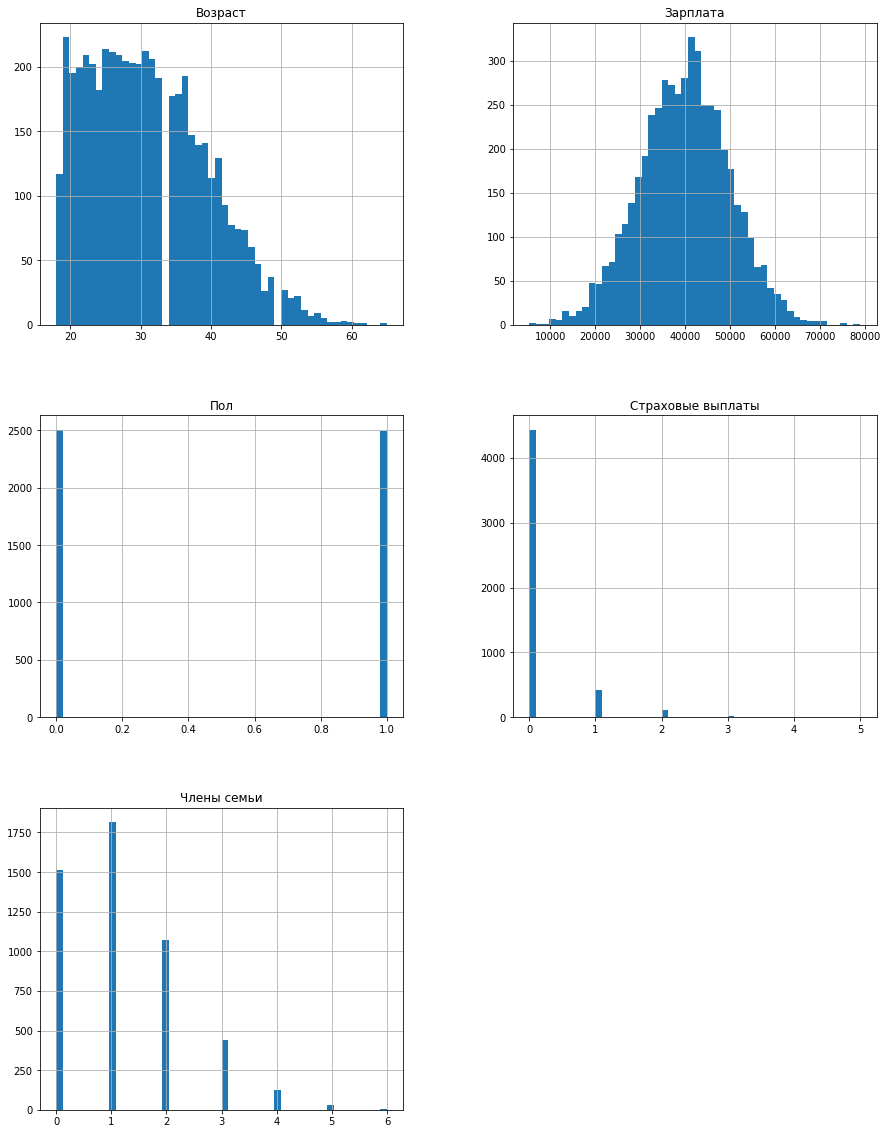

In [6]:
df.hist(bins = 50, figsize = (15,20));

Очевидно, основная цель данного проекта далеко не предобработка данных, поэтому всё образцовопоказательно со старта: пропусков нет, значения признаков вменяемы, аномалий в рамках выборки не наблюдается.

Единственное, что хотелось бы поправить, прежде, чем приступить к выполнению поставленной задачи, это названия столбцов.

In [7]:
df.columns = (['sex', 
               'age', 
               'salary', 
               'family_members', 
               'insurance_payments'])

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** 

Допустим, что: 

$$
a' = Xw'
$$

, где: 

$$
w' = ((X P)^T (X P))^{-1} (X P)^T y
$$

Докажем, что: 

$$
a' = a
$$

$$
w' = ((X P)^T (X P))^{-1} (X P)^T y = 
$$

$$
= (X P)^{-1} ((X P)^T)^{-1} (X P)^T y =
$$

$$
= P^{-1} X^{-1} (P^T X^T)^{-1} P^T X^T y =
$$

$$
 = P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^T y = 
$$

$$
 = P^{-1} X^{-1} (X^T)^{-1} E X^T y =
$$

$$
 = P^{-1} (X^T X)^{-1} X^T y =
$$

$$
 = P^{-1} w
$$

Отсюда:

$$
a' = X P w' = X P P^{-1} w = X E w = X w = a
$$

, где E - единичная матрица.

Что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**

1. Создадим случайную матрицу $ A $;
2. Проверим матрицу $ A $ на обратимость;
3. Защитим персональные данные клиентов, умножив признаки `features_train` 
($ n\ x\ p $) и `features_valid` ($ m\ x\ p $) на матрицу A ($ p\ x\ p $) .
4. Далее, создадим класс `LinearRegression`. 
5. Дополнительных операций внутри класса `LinearRegression` для получения исходных значений признаков `features_train` и `features_valid` не требуется. 
6. Рассчитаем финальную метрику `R2`.
7. Для проверки сравним с аналогичной метрикой для тех же данных, но без преобразований.

**Обоснование**

1. Чтобы проверить матрицу $ A $ на обратимость, найдём обратную к ней матрицу $ A^{-1} $

2. Домножение признаков `features_train` ($ n\ x\ p $) и `features_valid` ($ m\ x\ p $) на случайную матрицу $ A $ ($ p\ x\ p $) не повлияет на итоговый результат, так как: 

$$
a' = X P w' = X P P^{-1} w = X E w = X w = a
$$

 , что доказано в пункте 2. 

 3. Каких-либо ещё преобразований от нас больше не требуется. Сравним полученные результаты метрик `R2` для непреобразованных и преобразованных данных соответственно.

## Проверка алгоритма

Обучим модель линейной регрессии без каких-либо преобразований

In [8]:
features= df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size= 0.25, random_state=12345)

In [10]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
R_2 = r2_score(target_valid, predictions)
print(R_2)

0.435227571270266


Теперь будет действовать согласно описанному в пункте 3 алгоритму

In [11]:
features= df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size= 0.25, random_state=12345)

Напишем цикл, который бы объединял в себе: 
1. Создание матрицы $ A $;
2. Проверку матрицы на обратимость;

In [13]:
while True:
        
    try:            
        A = np.random.normal(size=(features_train.shape[1],features_train.shape[1]))
        A_inv = np.linalg.inv(A)
            
    except:
        continue
            
    break

Преобразуем признаки

In [14]:
features_train = features_train @ A

In [15]:
features_valid = features_valid @ A

Создадим класс `LinearRegression`

In [16]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target 
        w = np.linalg.inv(X.T @ X) @ X.T @ y 
        self.w = w[1:]
        self.w0 = w[0]
    
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [18]:
def mse(target, predictions):
    return((target - predictions)**2).mean()

In [19]:
mse_1 = mse(target_valid, predictions)

In [20]:
mean = np.full(target_valid.shape[0], target.mean())

In [21]:
mse_mean = mse(target_valid, mean)

Рассчитаем финальную метрику `R2`

Для наглядности добавим индекс t (transformed - преобразованный) к названию метрики

In [22]:
R_2_t = 1 - mse_1 / mse_mean

Сравним полученные значения метрики `R2`

In [23]:
pd.Series([R_2,R_2_t], ['R_2', 'R_2_t'])

R_2      0.435228
R_2_t    0.435271
dtype: float64

Полное совпадние

## Вывод

Таким образом, из полученных результатов хорошо видно, что выбранный алгоритм преобразования данных является верным. Значения метрики `R2` до и после преобразований абсолютно идентичны.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования